## homework 3 - introduction to graph networks

goals of this assignment:
1. basic introduction to the DGL library https://www.dgl.ai/
2. train a classifier that takes a point cloud as input. to submit you must achieve validation accuracy over 85%
3. learn to work with dgl graphs, node data and batching
4. build a deepset architecture with dgl mean_nodes and broadcast_nodes functions




first step, download the dataset. 
its a modified version of the MNIST dataset where the images have been converted to point clouds

In [1]:
!wget https://www.dropbox.com/s/246zhani5mptt7a/Dataset.zip

In [1]:
!unzip Dataset.zip

we will work with DGL (https://www.dgl.ai/) so install it

In [ ]:
pip install dgl

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dgl
import pandas as pd
import torch

Using backend: pytorch


#### dataset object is already built - no need to deal with it - but its a good idea to have a look at how the DGL graph is created.

In [3]:
from dataloader import PointCloudMNISTdataset, collate_graphs

In [4]:
training_dataset = PointCloudMNISTdataset('Dataset/training_ds.h5')
validation_dataset = PointCloudMNISTdataset('Dataset/valid_ds.h5')

the dataset returns a graph, and a target class (0 to 9)

In [5]:
g, y = training_dataset[663]

In [6]:
g,y

(Graph(num_nodes=93, num_edges=0,
       ndata_schemes={'xy': Scheme(shape=(2,), dtype=torch.float32)}
       edata_schemes={}),
 tensor(4))

the graphs have no edges, they are just a collection of nodes - 

and the nodes have a feature which is named "xy"

"xy" represnts the position of the node in 2d space

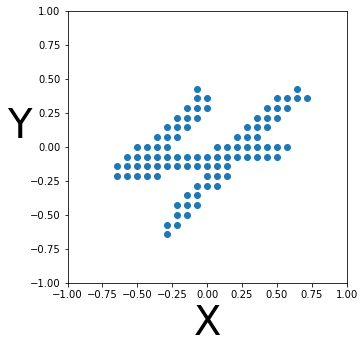

In [7]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(5,5))

xy = g.ndata['xy'].data.numpy()

ax.scatter( xy[:,0],xy[:,1] )

ax.set_ylabel('Y ',fontsize=40,rotation=0)
ax.set_xlabel('X',fontsize=40)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.show()

###  dataloader and the custom collate function

since we need to batch our data in a "special" way, we have to tell the pytorch dataloader how to do it
we do this with the collate_graphs function which we define in dataloader.py

its already implemented, so you don't need to deal with it - but have a look at the code

In [8]:
from torch.utils.data import Dataset, DataLoader

data_loader = DataLoader(training_dataset, batch_size=300, shuffle=True,
                         collate_fn=collate_graphs)
validation_data_loader = DataLoader(validation_dataset, batch_size=300, shuffle=False,
                         collate_fn=collate_graphs)

In [9]:
for batched_g,y in data_loader:
    break

the batched graph includes all the nodes from all the graphs - and dgl keeps track of which nodes belong to each graph

In [10]:
batched_g,y

(Graph(num_nodes=32966, num_edges=0,
       ndata_schemes={'xy': Scheme(shape=(2,), dtype=torch.float32)}
       edata_schemes={}),
 tensor([1, 3, 4, 8, 0, 0, 7, 3, 0, 5, 8, 4, 3, 7, 1, 8, 4, 1, 6, 2, 1, 5, 3, 7,
         5, 3, 4, 8, 9, 7, 4, 3, 8, 5, 3, 0, 1, 2, 9, 1, 1, 9, 0, 2, 1, 9, 6, 6,
         4, 5, 0, 1, 9, 2, 6, 2, 3, 4, 6, 2, 1, 1, 2, 7, 3, 3, 9, 2, 4, 6, 9, 7,
         4, 6, 1, 6, 8, 8, 5, 1, 5, 4, 2, 2, 1, 0, 6, 2, 2, 6, 7, 3, 6, 7, 3, 4,
         2, 4, 2, 0, 4, 1, 0, 7, 2, 6, 8, 7, 7, 0, 2, 9, 2, 5, 5, 5, 0, 3, 0, 6,
         3, 6, 8, 5, 1, 7, 7, 8, 1, 0, 1, 3, 7, 7, 6, 1, 2, 7, 7, 2, 8, 8, 0, 9,
         5, 7, 2, 8, 8, 2, 5, 6, 3, 6, 8, 2, 3, 1, 1, 1, 5, 3, 8, 7, 7, 3, 4, 6,
         8, 1, 3, 4, 5, 1, 2, 7, 7, 6, 9, 8, 3, 5, 8, 8, 3, 7, 3, 4, 0, 6, 9, 3,
         5, 0, 1, 7, 9, 8, 3, 6, 1, 3, 6, 0, 3, 8, 8, 0, 6, 3, 8, 6, 5, 1, 7, 9,
         1, 7, 0, 3, 2, 4, 1, 5, 0, 5, 2, 4, 5, 1, 4, 7, 1, 1, 7, 7, 9, 5, 8, 4,
         3, 4, 3, 8, 8, 4, 6, 2, 8, 7, 3, 2, 2, 5, 3, 2, 6

In [22]:
batched_g.batch_num_nodes()

tensor([108,  72, 126, 102,  82, 143, 105, 146,  92, 111,  83,  91, 117, 126,
        145, 171,  90,  86,  48, 107, 113, 103, 175, 114, 122, 188,  74, 140,
        117, 123,  85, 119,  67,  73, 150, 107, 102,  51, 117, 162,  75, 161,
        141, 159,  87,  81, 113, 136,  78, 129,  52, 149, 116, 130, 119, 166,
         75,  96,  56,  49, 135,  71,  75,  36,  55,  48,  95,  97, 142,  77,
        145,  67,  69, 130, 106,  90, 167,  95, 109, 174,  87, 104, 158, 128,
         90,  74,  95,  70,  83, 123,  93, 101, 154, 180, 122, 171,  81,  82,
        120, 118, 113, 119,  47, 104,  59, 191, 132, 142, 145, 136, 201, 169,
        107,  91, 133, 111,  63, 109, 160, 170, 118,  64,  98, 161, 140, 173,
         81, 124, 122, 145,  60,  82,  54,  83, 101, 119,  72, 122,  96,  66,
         81, 104, 101, 123, 104,  97,  93,  86,  85, 128,  61,  94,  86, 109,
         66, 136, 100, 130, 116,  74,  78, 129,  87, 134, 153, 143, 152,  93,
        122,  53, 121, 103,  92,  76, 119,  73, 104, 124, 182, 1

### building the model

what are the building blocks we need?

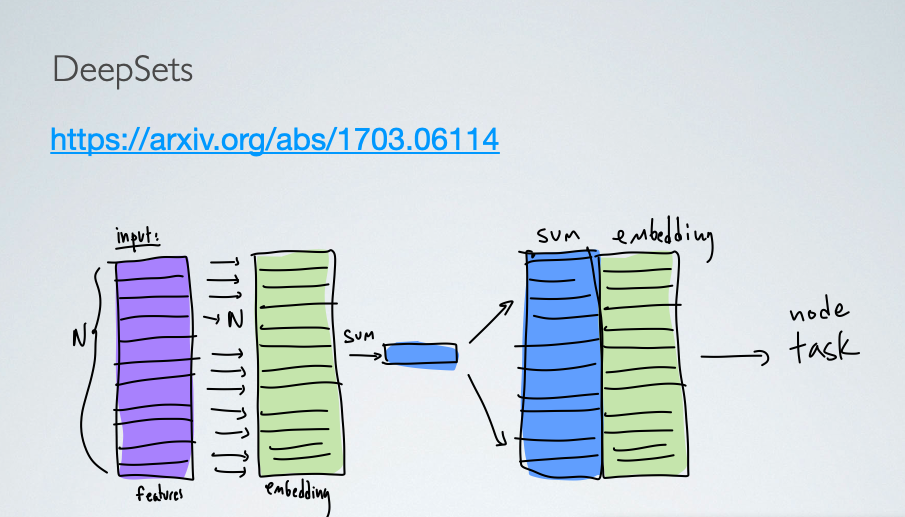

In [11]:
type(batched_g.ndata['xy']), batched_g.ndata['xy'].shape

(torch.Tensor, torch.Size([32966, 2]))

we need to be able to apply a network to each one of the nodes in the graph. we do that by applying a linear layer to the node features.

In [12]:
import torch.nn as nn

linear_layer = nn.Linear(2,10)
batched_g.ndata['hidden rep'] = linear_layer(batched_g.ndata['xy'])

In [13]:
batched_g.ndata['hidden rep'].shape

torch.Size([32966, 10])

next, we need to be able to take the mean of the hidden represenations in each graph - dgl has a function to do that

dgl.mean_nodes

this function knows our graph is a batch of different graphs

In [14]:
mean_of_node_rep = dgl.mean_nodes(batched_g,'hidden rep')
mean_of_node_rep.shape

torch.Size([300, 10])

we need to be able to "broadcast" this global mean back to each of the individual nodes, so that they are "aware" of the rest of the graph

In [15]:
broadcasted_sum = dgl.broadcast_nodes(batched_g,mean_of_node_rep)

In [16]:
broadcasted_sum.shape

torch.Size([32966, 10])

we assign this broadcasted global rep as a feature of the nodes

In [17]:
batched_g.ndata['global rep'] = broadcasted_sum

now we can use it as input for a new linear layer, and we can update the hidden rep for each node.
now the hidden rep for each node contains information from the entire graph

In [18]:
linear_layer2 = nn.Linear(10+10,10)

input_to_layer = torch.cat([
                            batched_g.ndata['hidden rep'], 
                            batched_g.ndata['global rep']],dim=1)

batched_g.ndata['hidden rep'] = linear_layer2(input_to_layer)

### what model should you build?

the final model should take a graph as input, and return a vector of length 10 (remember this is MNIST and our task is to classify digits)

this is the model that worked for me - feel free to do something else.

IMG_6175E13FF943-1.jpeg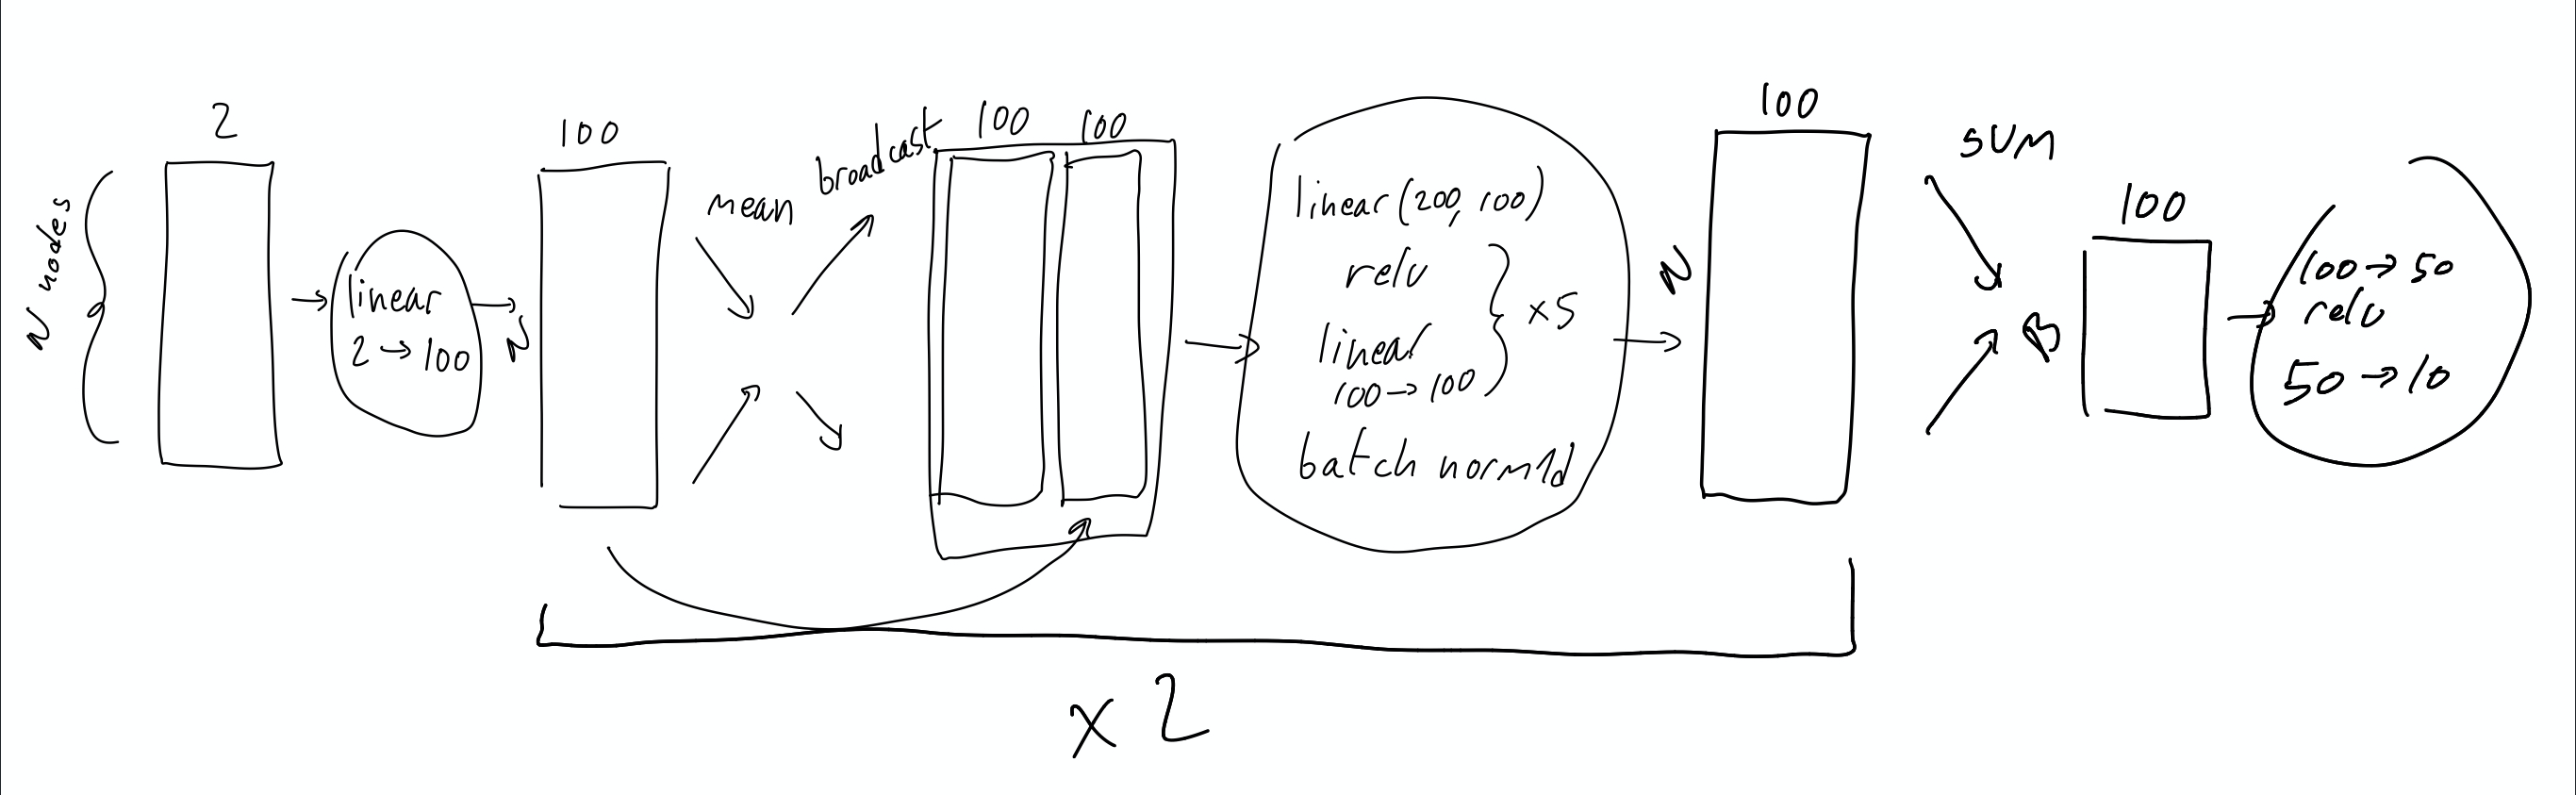

In [210]:
from model import Net

In [211]:
net = Net()

In [212]:
for batched_g,y in data_loader:
    break

make sure you are getting the right output shape.

In [213]:
net(batched_g).shape

torch.Size([300, 10])

## you can submit the homework when the validation accuracy is above 85%

In [215]:
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.00005) 

In [216]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for batched_g,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                batched_g = batched_g.to(torch.device('cuda'))
                y = y.cuda()
            pred = net(batched_g)
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)
    loss = loss/n_batches      
    return correct/total, loss

In [217]:
if torch.cuda.is_available():
    net.cuda()

In [23]:
from tqdm.notebook import tqdm

n_epochs = 30


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
       
    net.train() # put the net into "training mode"
    for batched_g,y in data_loader:
        if torch.cuda.is_available():
            batched_g = batched_g.to(torch.device('cuda'))
            y = y.cuda()
            
        optimizer.zero_grad()
        pred = net(batched_g)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()
    
    net.eval() #put the net into evaluation mode
    train_acc, train_loss = compute_accuracy_and_loss(data_loader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(validation_data_loader,net)
         
    training_loss_vs_epoch.append(train_loss)    
    training_acc_vs_epoch.append( train_acc )
    
    validation_acc_vs_epoch.append(valid_acc)
    
    validation_loss_vs_epoch.append(valid_loss)
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), 'trained_model.pt')

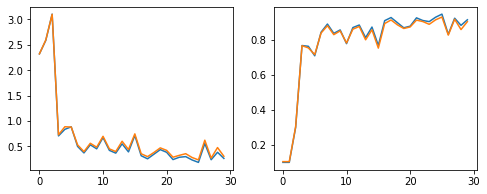

In [219]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()